# Medical Image Analyzer

<a id="introduction"></a>

This project works with a dataset containing information about various chemical compounds and their corresponding activity levels. The goal of this project is to develop a machine learning model that can accurately predict the activity level of a given compound based on its molecular structure.
The dataset consists of two main columns: 'smiles' and 'activity'. The 'smiles' column contains the SMILES (Simplified Molecular Input Line Entry System) strings, which are a linear notation for representing molecular structures. The 'activity' column contains the activity level of each compound, categorized as 'inactive', 'intermediate', or 'active'.


* [Libraries](#libraries)

Importing and installation of libraries. Cell and output hidden in viewer for readability purposes.

* [Step 1: Data Loading and Exploratory Data Analysis](#step-one)

Load the dataset and perform exploratory data analysis to understand its structure and characteristics.

* [Step 2: Secondary Data Analysis](#step-two)

Additional analysis is performed to build on duplicates and missing data found in previous steop

* [Step 3: Initial Data Processing](#step-three)

Preprocess the data to prepare it for model training.

* [Step 4: RandomForestClassifier Training and Evaluation](#step-four)

Random Forest Model with ScikitLearn. Model chosen as it is easy to train and has high accuracy. XGBoost is a close second but hard to explain to decision makers. At least I can print out a decision tree.

* [Step 5: Tensorflow Deep Learning Training and Evaluation](#step-five)

Deep Learning Model training and evaluation. Disappointing results, probably requires more than 5500 rows of data for better accuracy, or specified domain expertise into proteomics.

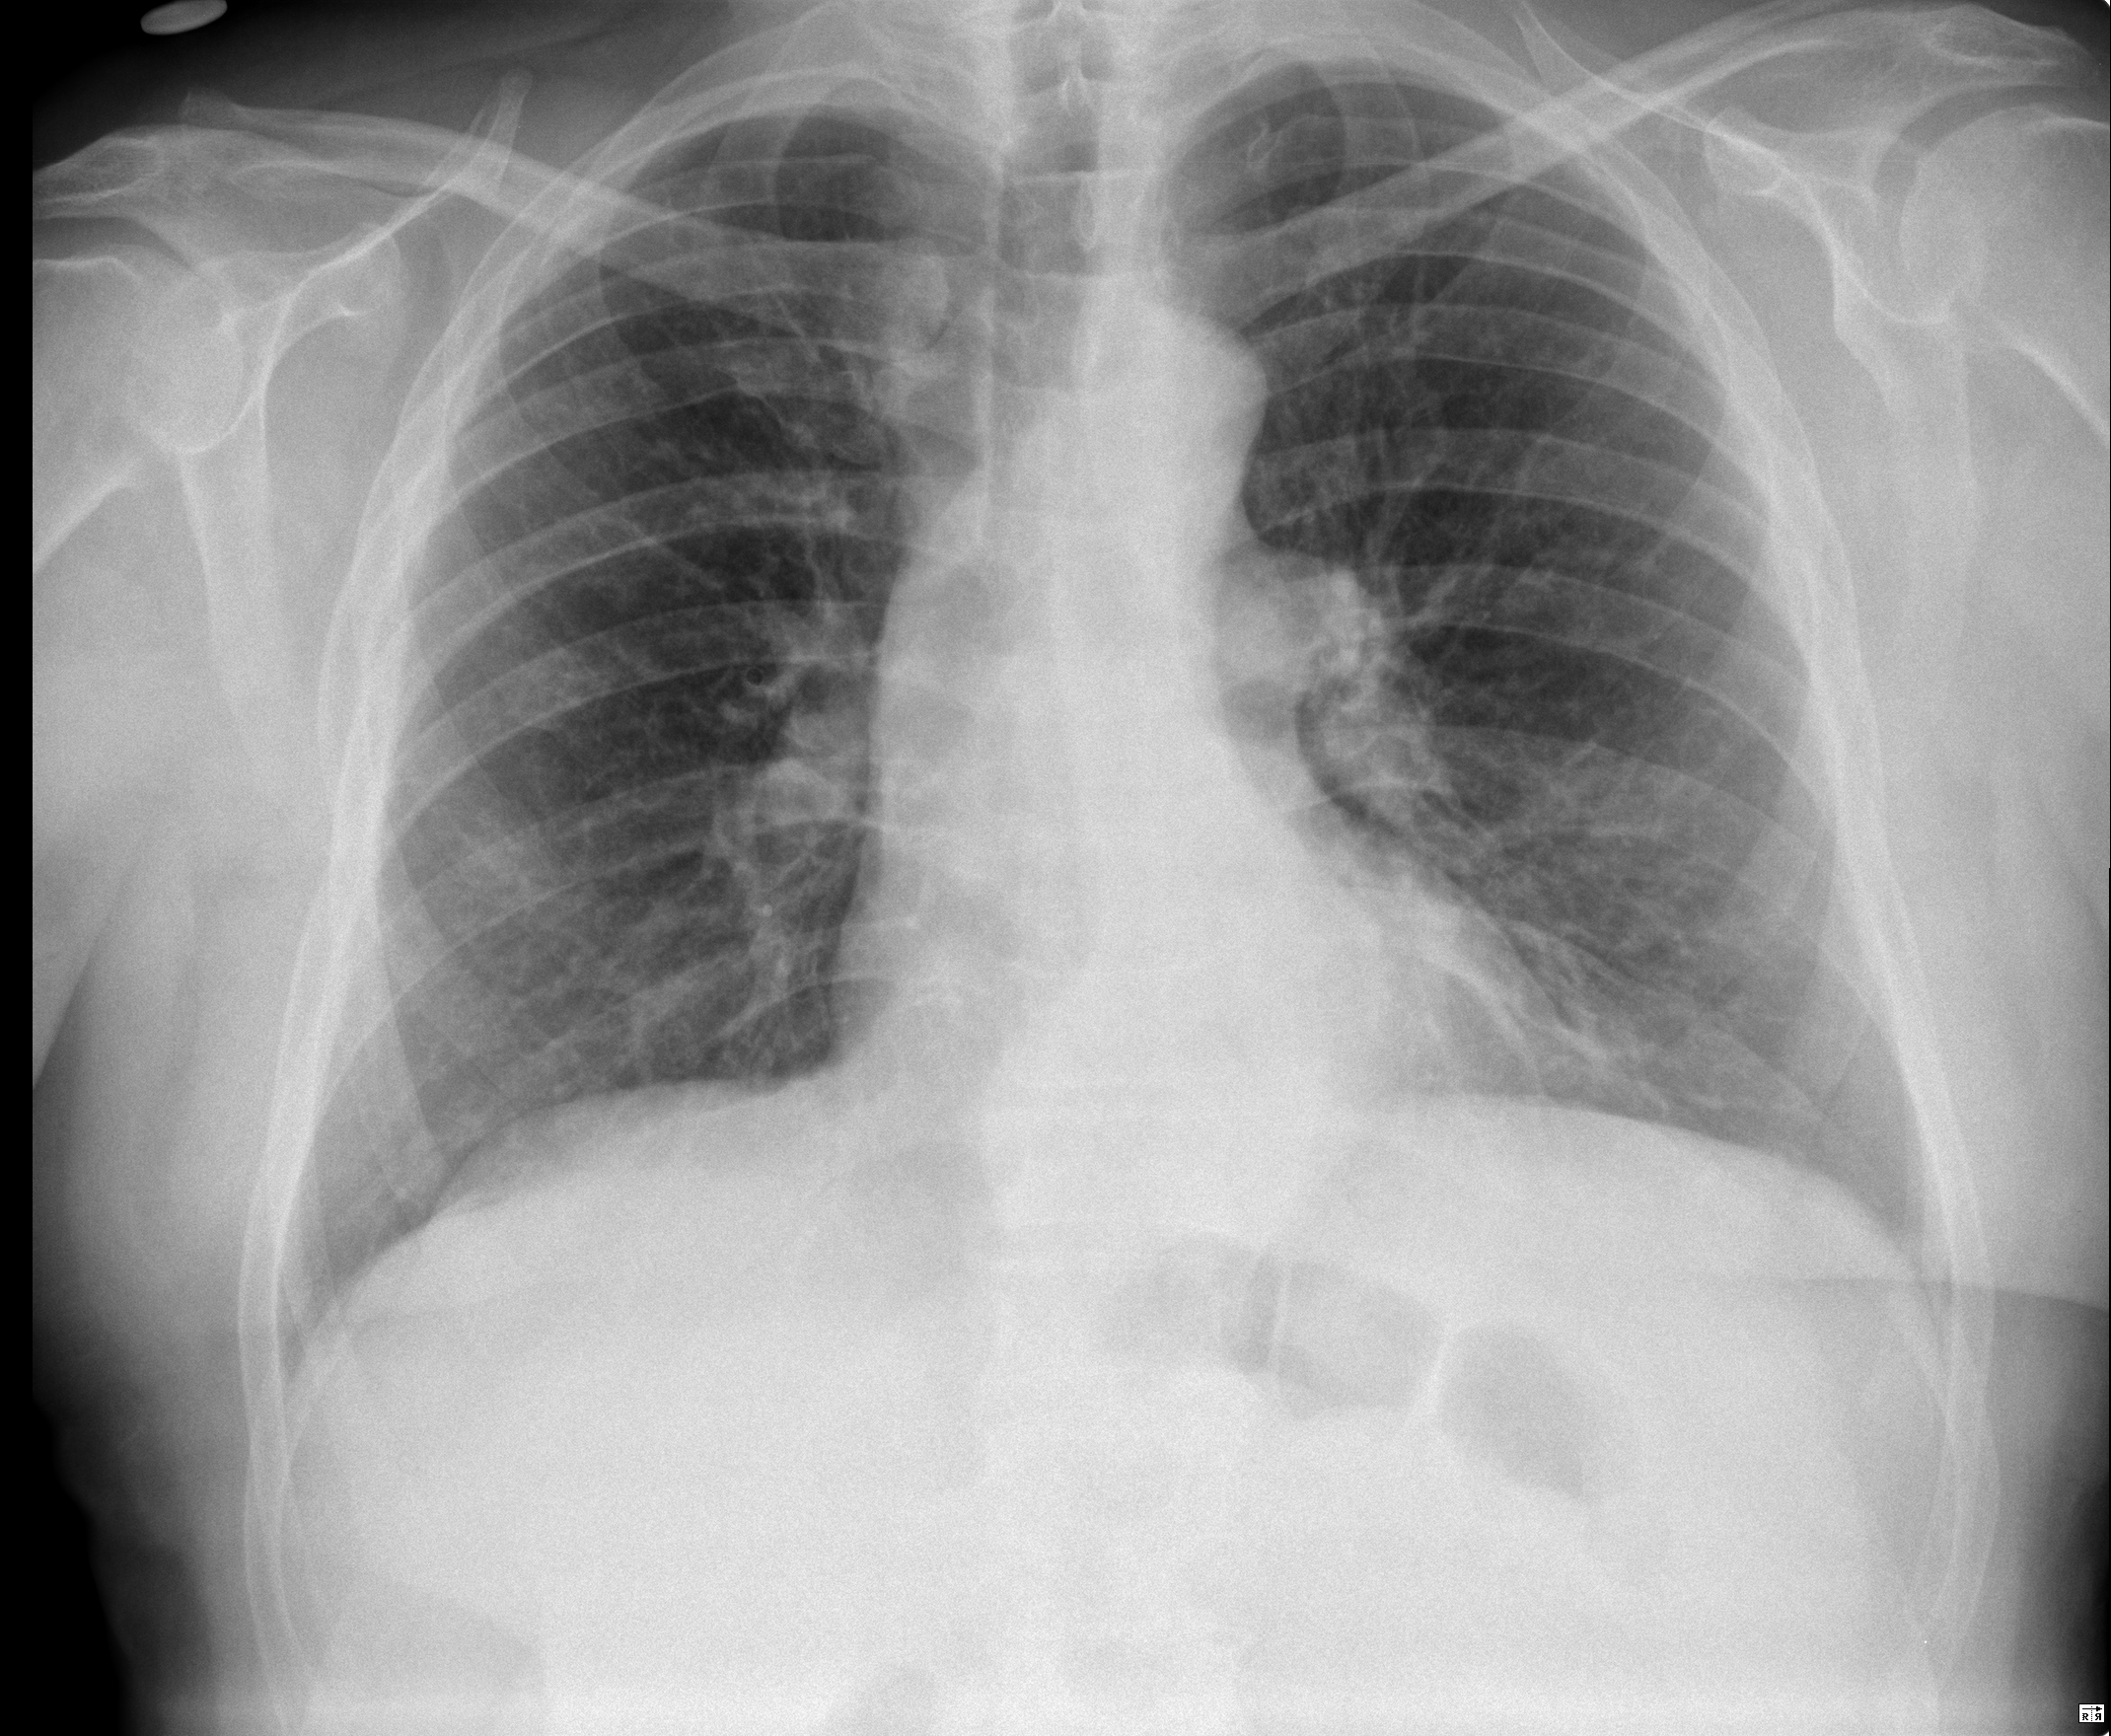

In [1]:
from PIL import Image
from IPython.display import display
img = Image.open('/kaggle/input/exporty/exporty/100639234103668738284185740390568891009_a21pht.png')
display(img)

In [2]:
import pandas as pd

reduced = pd.read_csv('/kaggle/input/exporty/exporty/exporty.csv')

print(reduced.to_string())

     Unnamed: 0.1  Unnamed: 0                                                       ImageID  StudyDate_DICOM                                        StudyID                                PatientID  PatientBirth PatientSex_DICOM ViewPosition_DICOM Projection               MethodProjection Pediatric Modality_DICOM         Manufacturer_DICOM PhotometricInterpretation_DICOM  PixelRepresentation_DICOM PixelAspectRatio_DICOM  SpatialResolution_DICOM  BitsStored_DICOM  WindowCenter_DICOM  WindowWidth_DICOM  Rows_DICOM  Columns_DICOM  XRayTubeCurrent_DICOM  Exposure_DICOM  ExposureInuAs_DICOM  ExposureTime  RelativeXRayExposure_DICOM         Labels group Partition  Subject_occurrences  Partition_occurrences  Partitionlabel_occurrences
0               1       14702            126022968388682456059208259745221627283_nul4bn.png         20160115        126022968388682456059208259745221627283  331532285849366680169157256726092267279        1935.0                F                NaN         PA  Manu

In [3]:
"""from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the images and labels
# Assuming you already have loaded the DataFrame 'reduced'

# Define a function to extract features from images (you may need to modify this based on your approach)
def extract_features(image_path):
    # Implement feature extraction logic here
    pass

# Extract features and labels
X = [extract_features(image_path) for image_path in reduced['filename']]
y = reduced['evaluation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)"""

"from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import classification_report\n\n# Load the images and labels\n# Assuming you already have loaded the DataFrame 'reduced'\n\n# Define a function to extract features from images (you may need to modify this based on your approach)\ndef extract_features(image_path):\n    # Implement feature extraction logic here\n    pass\n\n# Extract features and labels\nX = [extract_features(image_path) for image_path in reduced['filename']]\ny = reduced['evaluation']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Initialize the Random Forest Classifier\nclf = RandomForestClassifier(n_estimators=100, random_state=42)\n\n# Train the classifier\nclf.fit(X_train, y_train)"

In [4]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

# Data Preprocessing
image_dir = '/kaggle/input/exporty/exporty/'  # Directory where images are stored

# Load image paths and labels from the CSV file
image_paths = reduced['ImageID'].apply(lambda x: os.path.join(image_dir, x))
labels = reduced['Labels']

# Define label mapping
label_mapping = {
    "['normal']": 0,
    "['pneumonia']": 1  # Adjust as per your unique labels
}

# Convert labels to categorical format
labels = labels.apply(lambda x: label_mapping[x[0]] if isinstance(x, list) else label_mapping[x])  # Extract the label from the list and map it

valid_image_paths = image_paths[image_paths.apply(os.path.exists)]

# Load and preprocess images
X = []
y = []
for img_path, label in zip(valid_image_paths, labels):
    img = load_img(img_path, target_size=(224, 224))  # Assuming input size for the model is 224x224
    img = img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    X.append(img)
    y.append(label)

X = np.array(X)
y = to_categorical(y, num_classes=len(label_mapping))  # Convert labels to one-hot encoded format

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



2024-05-13 23:34:54.702835: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 23:34:54.702971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 23:34:54.837563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Define ResNet model
def create_resnet_model(input_shape, num_classes):
    base_model = ResNet50(include_top=False, input_shape=input_shape, pooling='avg', weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False  # Freeze layers of the pre-trained model
    
    model = Sequential([
        base_model,
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Assuming input size for the model is 224x224 with 3 channels (RGB)
num_classes = 2  # Number of classes (normal and abnormal)

# Create the model
model = create_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5381 - loss: 0.8884 - val_accuracy: 0.6282 - val_loss: 0.6802
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.5261 - loss: 0.8170 - val_accuracy: 0.7179 - val_loss: 0.6313
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4483 - loss: 0.8273 - val_accuracy: 0.4872 - val_loss: 0.7147
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5374 - loss: 0.6956 - val_accuracy: 0.5897 - val_loss: 0.6529
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5736 - loss: 0.6798 - val_accuracy: 0.6026 - val_loss: 0.6720
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5785 - loss: 0.6831 - val_accuracy: 0.5769 - val_loss: 0.6535
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5695 - loss: 0.6701 - val_accuracy: 0.6026 - val_loss: 0.6652
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.565

In [6]:
reduced.head()

reduced['Labels'].unique

<bound method Series.unique of 0         ['normal']
1         ['normal']
2         ['normal']
3         ['normal']
4         ['normal']
           ...      
395    ['pneumonia']
396    ['pneumonia']
397    ['pneumonia']
398    ['pneumonia']
399    ['pneumonia']
Name: Labels, Length: 400, dtype: object>